In [1]:
%matplotlib notebook

import sys
import os
import numpy as np
import cv2
sys.path.append("./utils/") # Adds higher directory to python modules path.
import loadcoraldata_utils as coralutils
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from NeMO_losses import charbonnierLoss
import NeMO_layers
from keras.models import Model, Sequential, load_model
from scipy.misc import imresize
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from metrics import metrics
import json

import tensorflow as tf
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

%matplotlib notebook

model = load_model('./tmp/Test_StyleTransfer.h5', custom_objects={'BilinearUpSampling2D':NeMO_layers.BilinearUpSampling2D, 'charbonnierLoss': charbonnierLoss, 'Var_Loss':NeMO_layers.Var_Loss, 'Gram_Loss':NeMO_layers.Gram_Loss, 'Content_Loss':NeMO_layers.Content_Loss})

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [2]:
model.summary()
Input = model.get_layer("model_1").get_input_at(0)
Style_layer = model.get_layer("model_1").get_output_at(0)

print("Cut Model:")
supermodel = Model(Input, Style_layer)
supermodel.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 256, 256, 4)   0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 256, 256, 4)   0                                            
____________________________________________________________________________________________________
model_1 (Model)                  (None, 256, 256, 4)   70203748    input_3[0][0]                    
____________________________________________________________________________________________________
model_2 (Model)                  [(None, 64, 64, 128), 125632      input_2[0][0]                    
                                                                   model_1[1][0]           

<IPython.core.display.Javascript object>


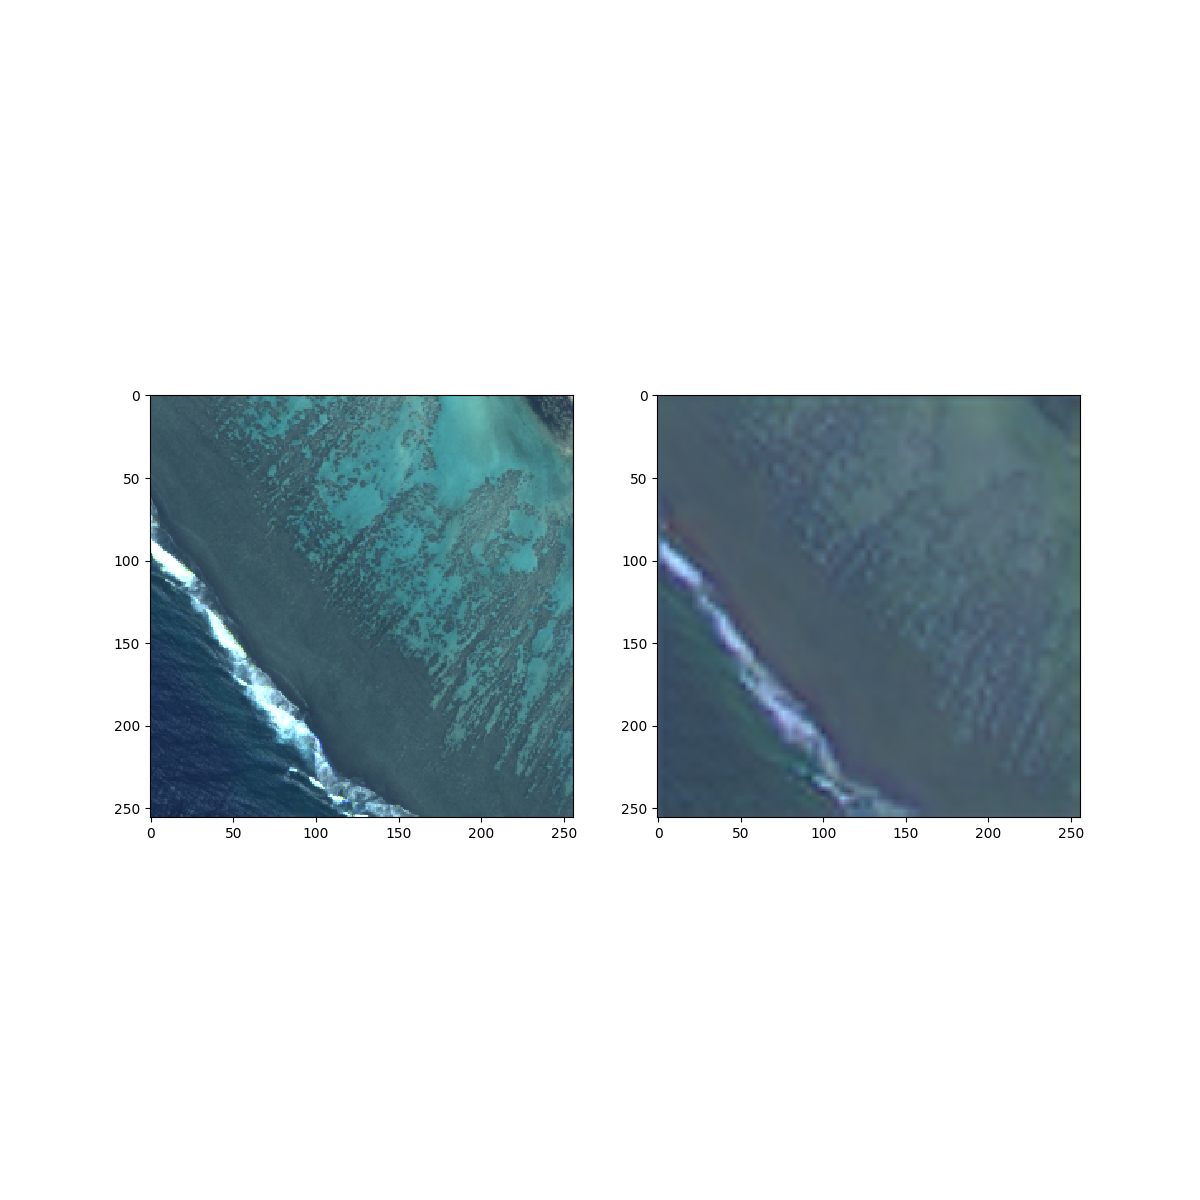

/home/asli/NeMO-Test/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [5]:
# imgpath = '/home/asli/NeMO-Test/NeMO-NET/Images/CiciaDANN_Target_256/Coral/Coral_00000020.tif'
imgpath = '/home/asli/NeMO-Test/NeMO-NET/Images/Jarrett_Training_Patches/Coral/Coral_00000020.tif'
# truthpath = '/home/asli/NeMO-Test/NeMO-NET/Images/CiciaDANN_TargetRef_256/Coral_00000010.png'

jsonpath = './utils/CoralClasses.json'

with open(jsonpath) as json_file:
    json_data = json.load(json_file)

TestImg = coralutils.CoralData(imgpath,load_type="raster")
TestImg.testimage = TestImg.image[:,:,:]
TestImg.testimage = np.delete(TestImg.testimage, [0,3,5,7], 2) # harded coded for BGR + NIR

imgbatch = np.expand_dims(TestImg.testimage, axis=0)
imgpredict = supermodel.predict(imgbatch, batch_size = 1)[0]

fig = plt.figure(1,figsize=(12,12))
ax = plt.subplot(1,2,1)
patch_R = 100*TestImg.testimage[:,:,2]+100
patch_G = 100*TestImg.testimage[:,:,1]+100
patch_B = 100*TestImg.testimage[:,:,0]+100
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
ax = plt.subplot(121)
ax.imshow(np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3))


patch_R = 100*imgpredict[:,:,2]+100
patch_G = 100*imgpredict[:,:,1]+100
patch_B = 100*imgpredict[:,:,0]+100
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
ax = plt.subplot(122)
ax.imshow(np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3))

